# Project: Big Data - Comparing ec2 Instance Performances

## Short S3 Tutorial

a) access s3 in your aws account \
b) upload data file \
c) access IAM in your aws account (put in aws search bar) \
d) look for ec2 default role (just familiarize yourself with the name) \
e) now go to your instances \
f) click on one of your instances' ID summaries \
g) click on the instant action drop down menu \
h) click on security \
i) select Modify IAM role \
j) add the default ec2 IAM role & then press update \
k) restart kernel in jupyter lab & run code below \
** Ask Elisabeth or chatgpt for further clarification **

## Connect Dask

In [1]:
from dask.distributed import Client

# Create a client and connect to the scheduler
client = Client('172.31.3.68:8786')

# Restart the client
client.restart()

# Perform an operation to check if the client is active
# For example, you can print the cluster information
print(client)


<Client: 'tcp://172.31.3.68:8786' processes=0 threads=0, memory=0 B>


## Connect s3 data

In [2]:
import boto3

s3 = boto3.client('s3') # connect to s3

In [4]:
response = s3.list_objects_v2(Bucket='digit-dataset') # connect to s3 bucket

In [5]:
for obj in response['Contents']: # show bucket contents
    print(obj['Key'])

digits.csv


In [8]:
s3.download_file('digit-dataset', 'digits.csv', 'digits.csv') # should download into file successfully

In [10]:
import pandas as pd
import numpy as np

In [11]:
df = pd.read_csv("digits.csv")

In [14]:
df.head(10)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9


In [34]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import sklearn
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import classification_report

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df, df.target, test_size=0.2, random_state=42)

In [29]:
knn = KNeighborsClassifier(n_neighbors=5)

In [30]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [31]:
y_pred = knn.predict(X_test)

In [35]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        33\n           1       1.00      1.00      1.00        28\n           2       1.00      1.00      1.00        33\n           3       1.00      1.00      1.00        34\n           4       0.98      1.00      0.99        46\n           5       0.98      0.96      0.97        47\n           6       0.97      1.00      0.99        35\n           7       1.00      0.97      0.99        34\n           8       1.00      1.00      1.00        30\n           9       0.95      0.95      0.95        40\n\n    accuracy                           0.99       360\n   macro avg       0.99      0.99      0.99       360\nweighted avg       0.99      0.99      0.99       360\n'

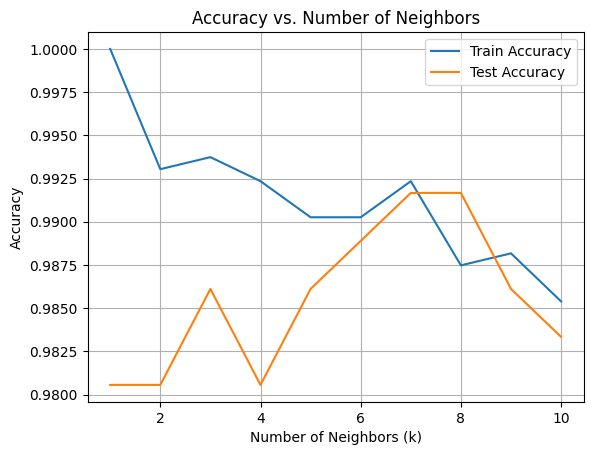

In [52]:
k_val = range(1,11)

# Initialize lists to store accuracy scores
train_accuracy = []
test_accuracy = []

# Iterate over each value of k
for k in k_val:

    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train, y_train)
    
    train_accuracy.append(knn.score(X_train, y_train))
    
    test_accuracy.append(knn.score(X_test, y_test))

# Plot the accuracy scores
plt.plot(k_val, train_accuracy, label='Train Accuracy')
plt.plot(k_val, test_accuracy, label='Test Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors')
plt.legend()
plt.grid(True)
plt.show()

In [53]:
for k_val, train_acc, test_acc in zip(k_val, train_accuracy, test_accuracy):
    print(f'k={k_val}: Train Accuracy={train_acc:.2f}, Test Accuracy={test_acc:.2f}')


k=1: Train Accuracy=1.00, Test Accuracy=0.98
k=2: Train Accuracy=0.99, Test Accuracy=0.98
k=3: Train Accuracy=0.99, Test Accuracy=0.99
k=4: Train Accuracy=0.99, Test Accuracy=0.98
k=5: Train Accuracy=0.99, Test Accuracy=0.99
k=6: Train Accuracy=0.99, Test Accuracy=0.99
k=7: Train Accuracy=0.99, Test Accuracy=0.99
k=8: Train Accuracy=0.99, Test Accuracy=0.99
k=9: Train Accuracy=0.99, Test Accuracy=0.99
k=10: Train Accuracy=0.99, Test Accuracy=0.98


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [56]:
mlp = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', max_iter=1000)

In [57]:
# Train the XOR classifier
mlp.fit(X_train, y_train)

/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=1000)

In [58]:
# Predict the labels for the test data
y_pred = mlp.predict(X_test)

In [59]:
# Evaluate the classifier's performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.03      0.06        33
           1       0.46      0.93      0.61        28
           2       0.43      0.88      0.57        33
           3       0.77      0.29      0.43        34
           4       0.86      0.26      0.40        46
           5       0.00      0.00      0.00        47
           6       0.34      0.91      0.50        35
           7       0.57      0.24      0.33        34
           8       0.14      0.07      0.09        30
           9       0.45      0.93      0.60        40

    accuracy                           0.44       360
   macro avg       0.43      0.45      0.36       360
weighted avg       0.44      0.44      0.35       360



/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [60]:
from sklearn.metrics import confusion_matrix

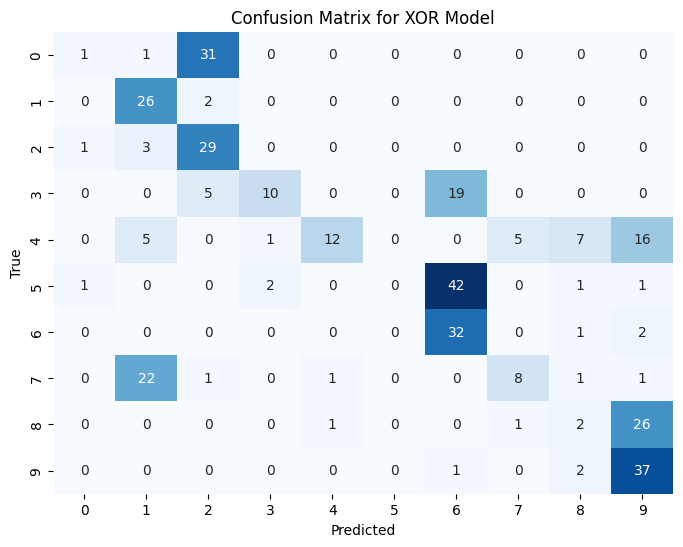

In [61]:
# Calculate confusion matrix for XOR model
conf_matrix_xor = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xor, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for XOR Model')
plt.show()


In [63]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

2024-04-12 08:34:23.971769: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-12 08:34:25.927707: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [65]:
# Reshape the digit images for CNN input
X_train_cnn = X_train.values.reshape(-1, 8, 8, 1)
X_test_cnn = X_test.values.reshape(-1, 8, 8, 1)

ValueError: cannot reshape array of size 93405 into shape (8,8,1)

In [ ]:
# Define the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(8, 8, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_cnn, y_test))

In [ ]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test_cnn, y_test)
print(f'Test accuracy: {test_acc}')